<a href="https://colab.research.google.com/github/ShuimuZeng/COMP338/blob/main/COMP338_ASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving torshin.jpeg to torshin.jpeg


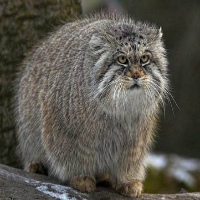

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt

# Read an image from the Drive
image = cv2.imread('/content/torshin.jpeg')  ## Change the image path if you place your image in different folder
image = cv2.resize(image, (200, 200)) # just resize the image to make it smaller for visualization


# show the image
cv2_imshow(image) ## use cv2.imshow("My Image", image) when you run the code locally

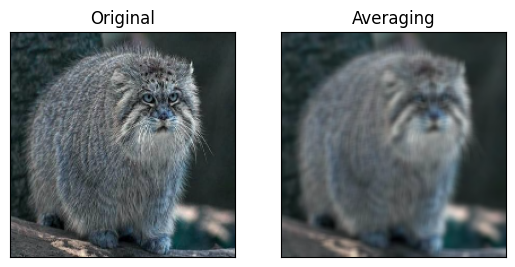

[47 56 60]
200
200 200


In [ ]:
img = image.copy()

kernel = np.ones((5,5),np.float32)/25 # define the kernel/filter
dst = cv2.filter2D(img,-1,kernel)     # apply the filter

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
#print(dst)
print(dst[0][0])
print(len(dst))
height, width = img.shape[:2]
print(height,width)

3


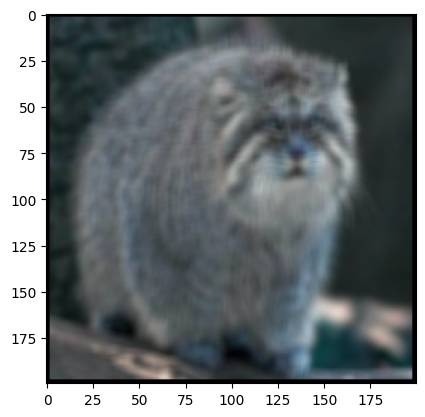

200 200
[0 0 0]


In [ ]:
img2 = image.copy()
def conv2D_color(image, kernel):
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Input image must be a color image (3 channels)")

    image_height, image_width, num_channels = image.shape
    print(num_channels)
    kernel_height, kernel_width = kernel.shape

    # Compute the padding to ensure the output has the same size as the input
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Initialize the output matrix with zeros
    output = np.zeros_like(image)

    for channel in range(num_channels):
        for i in range(pad_height, image_height - pad_height):
            for j in range(pad_width, image_width - pad_width):
                # Extract the region from the image that corresponds to the kernel
                region = image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1, channel]
                # Perform element-wise multiplication and sum to get the result
                output[i, j, channel] = np.sum(region * kernel)

    return output

# Example usage:
# Define a kernel we use the previous one
# Perform convolution on the color image
result = conv2D_color(img2, kernel)
plt.imshow(result)
plt.show()
height1, width1 = result.shape[:2]
print(height1,width1)
print(result[0][0])

In [ ]:
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving victoria1.jpg to victoria1.jpg


Saving victoria2.jpg to victoria2.jpg


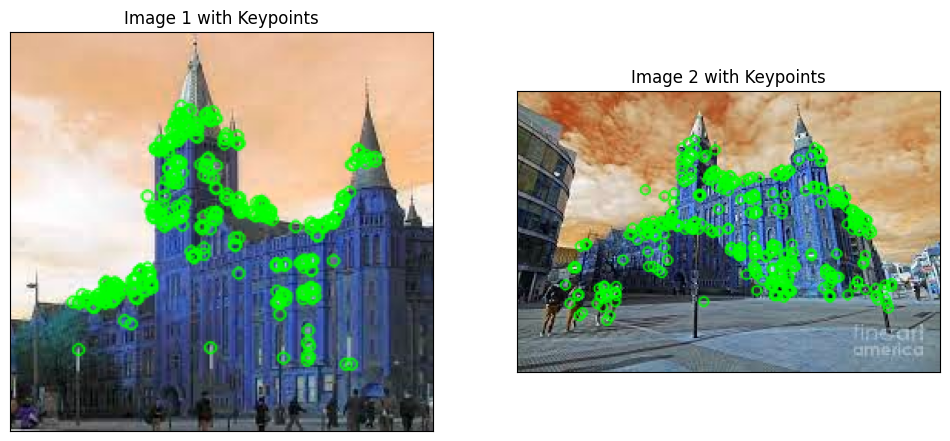

Number of Correct Matches (ORB): 0
Number of Incorrect Matches (ORB): 130


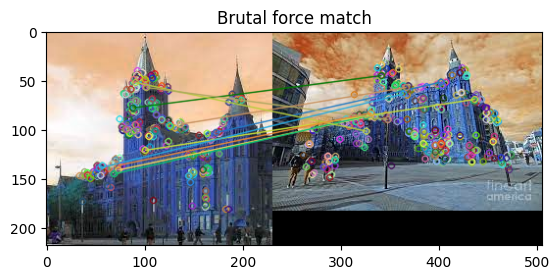

In [ ]:
# Load the two images
# image1 = cv2.imread('victoria1.jpg', cv2.IMREAD_GRAYSCALE)
# image2 = cv2.imread('victoria2.jpg', cv2.IMREAD_GRAYSCALE)

image1 = cv2.imread('victoria1.jpg')
image2 = cv2.imread('victoria2.jpg')

# Initialize the ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors in both images
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Create copies of the original images for visualization
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None, color=(0, 255, 0), flags=0)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None, color=(0, 255, 0), flags=0)

# Visualize the images with keypoints
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image1_with_keypoints), plt.title('Image 1 with Keypoints')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image2_with_keypoints), plt.title('Image 2 with Keypoints')
plt.xticks([]), plt.yticks([]),plt.show()

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match keypoints
matches_orb = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw the first 10 matches
result_orb = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_orb[:10], outImg=None)

# Define a matching threshold for correct matches
matching_threshold = 0.8

# Count the number of correct matches for ORB
correct_matches_orb = sum(1 for match in matches_orb if match.distance < matching_threshold)

incorrect_matches_orb = len(matches_orb) - correct_matches_orb

print("Number of Correct Matches (ORB):", correct_matches_orb)
print("Number of Incorrect Matches (ORB):", incorrect_matches_orb)



# Display the ORB matching results
plt.imshow(result_orb),plt.title('Brutal force match')


plt.show()

Number of Correct Matches (SIFT): 0
Number of Incorrect Matches (SIFT): 115


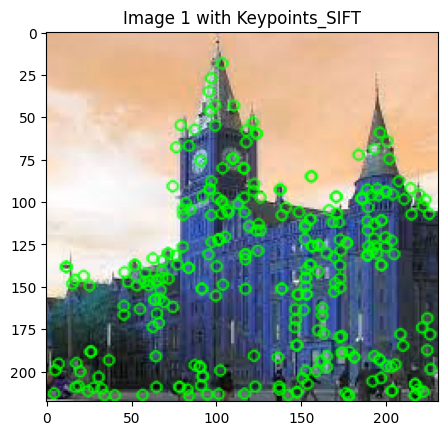

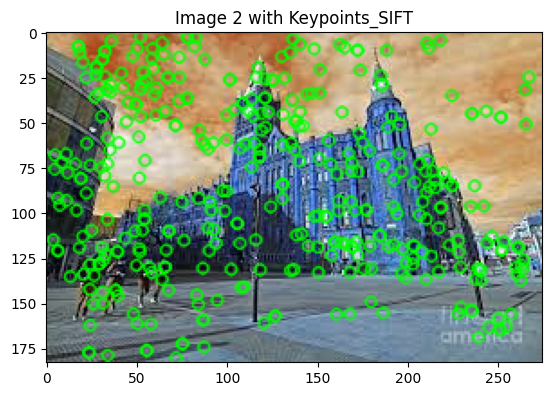

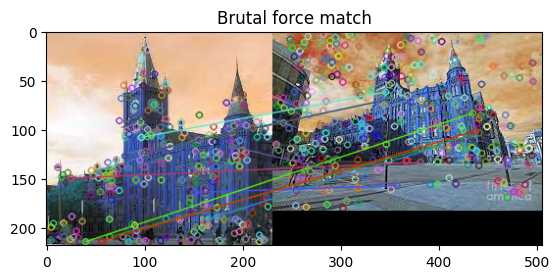

In [ ]:
# intialize sift

sift = cv2.SIFT_create()

# Extract keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Create copies of the original images for visualization
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None, color=(0, 255, 0), flags=0)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None, color=(0, 255, 0), flags=0)

# Create a Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match keypoints
matches_sift = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# Draw the first 10 matches
result_sift = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_sift[:10], outImg=None)


correct_matches_sift = sum(1 for match in matches_sift if match.distance < matching_threshold)

# Calculate the number of incorrect matches
incorrect_matches_sift = len(matches_sift) - correct_matches_sift


# Print the results
print("Number of Correct Matches (SIFT):", correct_matches_sift)
print("Number of Incorrect Matches (SIFT):", incorrect_matches_sift)



plt.imshow(image1_with_keypoints), plt.title('Image 1 with Keypoints_SIFT')

plt.show()

plt.imshow(image2_with_keypoints), plt.title('Image 2 with Keypoints_SIFT')

plt.show()

plt.imshow(result_sift),plt.title('Brutal force match')

plt.show()

